## Notebook to test SfM pipeline

1. The repo is already a git submodule so just git submodule update --init --recursive. 
2. Follow the other steps to get the dependencies here: https://www.opensfm.org/docs/building.html, use this file for installing dependencies https://github.com/paulinus/opensfm-docker-base/blob/master/Dockerfile.python3.
    1. Heads up you'll want to do the pip install from within the lcnn conda environment (or another one).
3. To test your install run:
    1. bin/opensfm_run_all data/berlin from the open_sfm directory
    2. python -m http.server and hit the link here: http://localhost:8000/viewer/reconstruction.html#file=/data/berlin/reconstruction.meshed.json
        1. Make sure you run python -m http.server from the OpenSfM directory

In [9]:
import sys, cv2, os
import numpy as np
import matplotlib.pyplot as plt
# from yaml import load, dump
# try:
#     from yaml import CLoader as Loader, CDumper as Dumper
# except ImportError:
#     from yaml import Loader, Dumper
import yaml
sys.path.append('../OpenSfM')
from opensfm import features, config
from sfm import utils as sfm_util
import importlib

### To test your own images 

1. run 'python video_converter.py --filename {filename} --n {save_every_n_images} --path {path_to_video}'
2. copy the config.yaml from OpenSfM/data/berlin to your {filename} directory

### Load Configuration

The first step is to load the config which will contain info on what features to use, how many etc.

In [26]:
file_path = "../data/lounge/" #directory containing images and config file
conf = config.load_config(file_path+'config.yaml') # load config + default config
%env SFM_DATA_DIR=../data/lounge

env: SFM_DATA_DIR=../data/lounge


In [27]:
%%bash 
../OpenSfM/bin/opensfm extract_metadata $SFM_DATA_DIR

2020-04-21 16:26:47,703 INFO: Loading existing EXIF for img_0.png
2020-04-21 16:26:47,703 INFO: Loading existing EXIF for img_2.png
2020-04-21 16:26:47,703 INFO: Loading existing EXIF for img_5.png
2020-04-21 16:26:47,703 INFO: Loading existing EXIF for img_4.png
2020-04-21 16:26:47,704 INFO: Loading existing EXIF for img_3.png
2020-04-21 16:26:47,704 INFO: Loading existing EXIF for img_7.png
2020-04-21 16:26:47,704 INFO: Loading existing EXIF for img_8.png
2020-04-21 16:26:47,704 INFO: Loading existing EXIF for img_1.png
2020-04-21 16:26:47,704 INFO: Loading existing EXIF for img_6.png


In [28]:
%%bash 
../OpenSfM/bin/opensfm detect_features $SFM_DATA_DIR

2020-04-21 16:26:49,677 INFO: Skip recomputing ROOT_ORB features for image img_0.png
2020-04-21 16:26:49,694 INFO: Skip recomputing ROOT_ORB features for image img_6.png
2020-04-21 16:26:49,725 INFO: Skip recomputing ROOT_ORB features for image img_7.png
2020-04-21 16:26:49,741 INFO: Skip recomputing ROOT_ORB features for image img_2.png
2020-04-21 16:26:49,749 INFO: Skip recomputing ROOT_ORB features for image img_3.png
2020-04-21 16:26:49,752 INFO: Skip recomputing ROOT_ORB features for image img_4.png
2020-04-21 16:26:49,776 INFO: Skip recomputing ROOT_ORB features for image img_5.png
2020-04-21 16:26:49,803 INFO: Skip recomputing ROOT_ORB features for image img_8.png
2020-04-21 16:26:49,849 INFO: Skip recomputing ROOT_ORB features for image img_1.png


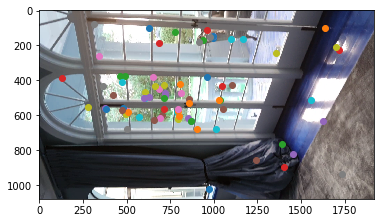

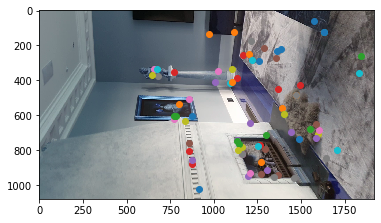

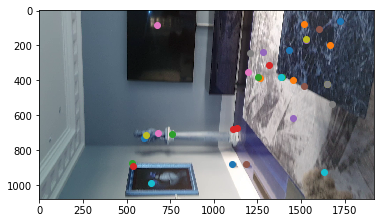

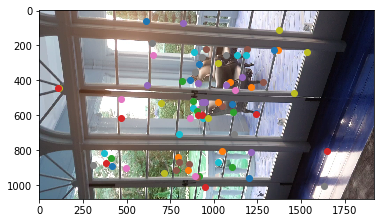

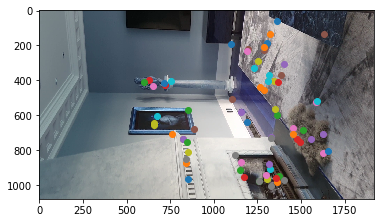

In [29]:
importlib.reload(sfm_util)
"""An Example of How to Load Pre-Detected features from the npz generated from:
                                    ../OpenSfM/bin/opensfm detect_features ../data/lounge"""
for i, filename in enumerate(os.listdir(file_path+"features")):
    if i % 2 == 0: # display every 2 images
        sfm_util.display_features(file_path, filename, conf, 50)


In [30]:
"""An example of how to add custom feature points to the npz file containing orb features"""
importlib.reload(sfm_util)

test_insert = False

if test_insert:

    feats_path = file_path+"features/img_0.png.features.npz"
    fts = features.load_features(feats_path, conf)
    print("Before Addition {}".format(fts[0].shape))

    # Generate 200 random points with descriptors and colors
    new_ft_pts = np.random.randint(0, 1080, (200, 4)) # 200 new random points
    new_ft_desc = np.random.randint(0, 255, (200, 32)) 
    new_ft_col = np.random.randint(0, 255, (200, 3)) 

    #Insert the features
    # sfm_util.insert_features((new_ft_pts, new_ft_desc, new_ft_col), feats_path, conf)

    # Check they were added
    fts = features.load_features(file_path+"features/img_0.png.features.npz", conf)
    print("After Addition: {}".format(fts[0].shape))
    assert(np.allclose(fts[0][-200:], new_ft_pts))

In [31]:
%%bash 
../OpenSfM/bin/opensfm match_features ../data/lounge/

2020-04-21 16:27:08,350 INFO: Matching 36 image pairs
2020-04-21 16:27:08,356 INFO: Computing pair matching with 8 processes
2020-04-21 16:27:08,993 DEBUG: No segmentation for img_6.png, no features masked.
2020-04-21 16:27:08,993 DEBUG: No segmentation for img_7.png, no features masked.
2020-04-21 16:27:09,003 DEBUG: No segmentation for img_7.png, no features masked.
2020-04-21 16:27:09,004 DEBUG: No segmentation for img_3.png, no features masked.
2020-04-21 16:27:09,023 DEBUG: No segmentation for img_5.png, no features masked.
2020-04-21 16:27:09,024 DEBUG: No segmentation for img_2.png, no features masked.
2020-04-21 16:27:09,029 DEBUG: No segmentation for img_1.png, no features masked.
2020-04-21 16:27:09,030 DEBUG: No segmentation for img_4.png, no features masked.
2020-04-21 16:27:09,054 DEBUG: No segmentation for img_4.png, no features masked.
2020-04-21 16:27:09,055 DEBUG: No segmentation for img_2.png, no features masked.
2020-04-21 16:27:09,155 DEBUG: No segmentation for img_

In [32]:
%%bash 
../OpenSfM/bin/opensfm create_tracks $SFM_DATA_DIR

2020-04-21 16:27:12,090 INFO: reading features
2020-04-21 16:27:12,118 DEBUG: Merging features onto tracks
2020-04-21 16:27:12,138 DEBUG: Good tracks: 2492


In [33]:
%%bash 
../OpenSfM/bin/opensfm reconstruct $SFM_DATA_DIR

2020-04-21 16:27:16,397 INFO: Starting incremental reconstruction
2020-04-21 16:27:17,061 INFO: Starting reconstruction with img_0.png and img_2.png
2020-04-21 16:27:17,257 INFO: Two-view reconstruction inliers: 703 / 703
2020-04-21 16:27:17,360 INFO: Triangulated: 602
2020-04-21 16:27:17,406 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 2.945989e-02, Final cost: 2.280669e-02, Termination: CONVERGENCE
2020-04-21 16:27:17,485 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 2.308800e-02, Final cost: 2.074791e-02, Termination: CONVERGENCE
2020-04-21 16:27:17,555 DEBUG: Ceres Solver Report: Iterations: 8, Initial cost: 8.682612e+00, Final cost: 2.000755e-01, Termination: CONVERGENCE
2020-04-21 16:27:17,563 INFO: Removed outliers: 0
2020-04-21 16:27:17,564 INFO: -------------------------------------------------------
2020-04-21 16:27:17,576 INFO: img_1.png resection inliers: 375 / 377
2020-04-21 16:27:17,581 DEBUG: Ceres Solver Report: Iterations: 3, Initial cost: 1.2744

In [34]:
%%bash 
../OpenSfM/bin/opensfm mesh $SFM_DATA_DIR

### Viewing the mesh. 
#### Note: change ../data/lounge to the directory you are working from

python -m http.server (from main git folder) and hit the link here: http://localhost:8000/OpenSfM/viewer/reconstruction.html#file=/data/lounge/reconstruction.meshed.json

Also, coming next is the extraction of 3D info for the points it's all stored in reconstruction.json.
One problem we may run into is the junction descriptors not being matched between frames?? Then we will never get the 3D info. Also not entirely sure how we will know which points correspond to our junction info. Kidding this is below.

#### Is the point ID in the matched point thing is the index of the points in the initial list of image features? No I think it is the track_id that corresponds to that point. 

Looks like I could check which points correspond to 3D features in each image by checking tracks.csv.

The values of the columns are indicated below (where x, y are in normalized image coordinates). ? could be angle or size of feature.

image, track_id, feature_id, x, y, z, r, g, b

In [110]:
importlib.reload(sfm_util)
poses = sfm_util.get_camera_poses(file_path) # uses their pose class to get the homogeneous transform
for img in poses.keys():
    print("{} camera pose\n{}".format(img, poses[img])) # (R|t) format

img_0.png camera pose
[[ 9.99566314e-01 -2.94479774e-02  1.29783118e-05  5.96264261e-02]
 [ 1.13030517e-05 -5.70552598e-05 -9.99999998e-01 -2.12878042e+00]
 [ 2.94479781e-02  9.99566313e-01 -5.66976637e-05  1.95062800e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
img_2.png camera pose
[[ 9.98891689e-01 -4.70679659e-02  3.26184097e-05  3.02330854e-01]
 [ 3.20636613e-05 -1.25411166e-05 -9.99999999e-01 -1.39874201e+00]
 [ 4.70679662e-02  9.98891689e-01 -1.10180458e-05  9.15540738e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
img_1.png camera pose
[[ 9.99068917e-01 -4.31427434e-02 -4.58657487e-05  1.16319981e-01]
 [-4.34415446e-05  5.71278372e-05 -9.99999997e-01 -1.61058823e+00]
 [ 4.31427459e-02  9.99068917e-01  5.52004590e-05  1.74037655e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
img_3.png camera pose
[[ 9.97215843e-01 -7.45691855e-02 -1.41465136e-06  5.86233005e-01]
 [-5.15033885e-07  1.20834284e-05 -1.0

In [105]:
feats = sfm_util.load_3d_features(file_path)
print(feats.keys())
print(feats['img_0.png'].keys())

.........................................................
121 matches not found, 5638 matches found
dict_keys(['img_0.png', 'img_2.png', 'img_1.png', 'img_3.png', 'img_4.png'])
dict_keys(['feat_ids', 'coords', 'track_ids'])


In [78]:
%%bash 
../OpenSfM/bin/opensfm undistort $SFM_DATA_DIR

2020-04-21 17:24:35,078 DEBUG: Undistorting the reconstruction
2020-04-21 17:24:35,691 DEBUG: Undistorting image img_0.png
2020-04-21 17:24:35,803 DEBUG: Undistorting image img_2.png
2020-04-21 17:24:35,840 DEBUG: Undistorting image img_1.png
2020-04-21 17:24:35,845 DEBUG: Undistorting image img_4.png
2020-04-21 17:24:35,857 DEBUG: Undistorting image img_3.png


In [33]:
%%bash 
../OpenSfM/bin/opensfm compute_depthmaps $SFM_DATA_DIR

2020-04-16 13:06:36,284 INFO: Computing neighbors
2020-04-16 13:06:36,812 INFO: Computing depthmap for image img_2.png with PATCH_MATCH_SAMPLE
2020-04-16 13:06:36,840 INFO: Computing depthmap for image img_3.png with PATCH_MATCH_SAMPLE
2020-04-16 13:06:36,842 INFO: Computing depthmap for image img_0.png with PATCH_MATCH_SAMPLE
2020-04-16 13:06:36,855 INFO: Computing depthmap for image img_1.png with PATCH_MATCH_SAMPLE
2020-04-16 13:06:36,942 INFO: Computing depthmap for image img_4.png with PATCH_MATCH_SAMPLE
2020-04-16 13:06:51,671 INFO: Cleaning depthmap for image img_0.png
2020-04-16 13:06:51,672 INFO: Cleaning depthmap for image img_2.png
2020-04-16 13:06:51,674 INFO: Cleaning depthmap for image img_1.png
2020-04-16 13:06:51,675 INFO: Cleaning depthmap for image img_3.png
2020-04-16 13:06:51,678 INFO: Cleaning depthmap for image img_4.png
2020-04-16 13:06:52,896 INFO: Pruning depthmap for image img_0.png
2020-04-16 13:06:52,898 INFO: Pruning depthmap for image img_2.png
2020-04-16 

### Viewing PLY Files
sudo apt-get install meshlab -y

done

%%bash 
../OpenSfM/bin/opensfm export_ply ../data/lounge